[LangGraph](https://langchain-ai.github.io/langgraph/tutorials/introduction/)

Here we are :
* Create a Chatbots With Langgraph

We will use state-of-the-art open models from Google for LLM -> *Gemma2-9b-It*  for testing.

In [18]:
!pip install langgraph langsmith

In [19]:
!pip install langchain langchain_groq langchain_community

In [20]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)


ls__0a667f0b1a484a1e827f23f77479c801


In [21]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="TestLanggraph"

In [22]:
from langchain_groq import ChatGroq

In [23]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78310d093b80>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78310d0e03a0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

Let's Building Chatbot Using Langgraph

In [24]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [25]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

# Initialize the StateGraph with the defined State structure
graph_builder=StateGraph(State)

In [26]:
graph_builder

In [27]:
def chatbot(state:State):
    # This function takes the current state as input and returns the updated state with new messages.
    # The 'llm.invoke' function is called with the current list of messages from the state,
    # generating a response which is then returned as part of the updated state.
  return {"messages":llm.invoke(state['messages'])}

In [28]:
# Add the 'chatbot' function as a node to the state graph.
# This node can be invoked in the state graph to process the state and update it using the chatbot function.
graph_builder.add_node("chatbot",chatbot)

In [29]:
graph_builder

In [30]:
# Define the flow of the state graph.
# Start by connecting the START node to the 'chatbot' node.
graph_builder.add_edge(START,"chatbot")
# Then, connect the 'chatbot' node to the END node, marking the completion of the state transition.
graph_builder.add_edge("chatbot",END)

In [31]:
# Compile the state graph, finalizing its structure.
# This prepares the graph for execution by setting up the nodes and edges as defined earlier.
graph=graph_builder.compile()

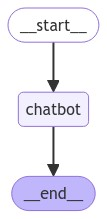

In [32]:
from IPython.display import Image, display
try:
    # Attempt to generate and display a visual representation of the compiled state graph.
    # The graph is rendered as a PNG image using Mermaid and then displayed in the output.
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  # If there is any issue during the graph generation or display, it will be silently ignored.
  pass

In [33]:
while True:
  # Continuously prompt the user for input
  user_input=input("User: ")

  # Check if the user wants to quit the conversation
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break

  # Stream events through the graph using the user's input
  for event in graph.stream({'messages':("user",user_input)}):
    # Print all event values (debugging/verification step)
    print(event.values())

    # Iterate through the event values to extract and print the assistant's response
    for value in event.values():
      print(value['messages'])# Prints the entire messages list
      print("Assistant:",value["messages"].content)  # Prints the content of the assistant's response

User: Hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 4.7e-07, 'queue_time': 0.014327557999999999, 'total_time': 0.027273197}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-780b02d0-abd3-410c-9895-b35c7e9cdbf8-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 4.7e-07, 'queue_time': 0.014327557999999999, 'total_time': 0.027273197}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-780b02d0-abd3-410c-9895-b35c7e9cdbf8-0' us